# Recruit Restaurant Visitor Forecasting

Running a thriving local restaurant isn't always as charming as first impressions appear. There are often all sorts of unexpected troubles popping up that could hurt business.

One common predicament is that restaurants need to know how many customers to expect each day to effectively purchase ingredients and schedule staff members. This forecast isn't easy to make because many unpredictable factors affect restaurant attendance, like weather and local competition. It's even harder for newer restaurants with little historical data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

# MAke the date column as index while reading the csv
rv = pd.read_csv('RestaurantVisitors.csv', index_col='date', parse_dates=True)
rv.head(12)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
2016-01-06,Wednesday,0,na,9.0,11.0,22.0,41.0,83.0
2016-01-07,Thursday,0,na,15.0,6.0,18.0,30.0,69.0
2016-01-08,Friday,0,na,79.0,32.0,22.0,16.0,149.0
2016-01-09,Saturday,0,na,44.0,44.0,47.0,99.0,234.0


In [35]:
rv.shape

(517, 8)

In [36]:
rv.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [37]:
rv2 = rv

In [38]:
rv = rv.dropna()
rv.isnull().sum()

weekday         0
holiday         0
holiday_name    0
rest1           0
rest2           0
rest3           0
rest4           0
total           0
dtype: int64

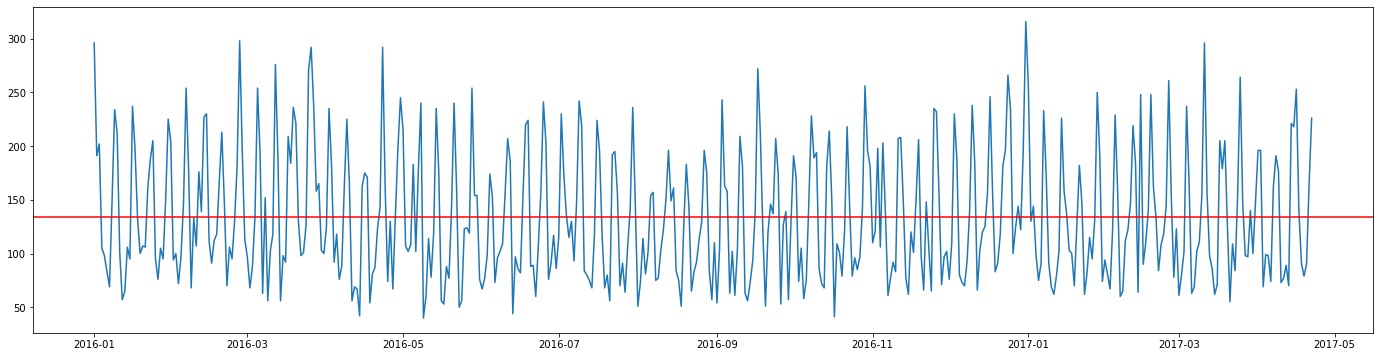

In [39]:
plt.figure(figsize=(24, 6)) # x,y
plt.plot(rv.total)
plt.axhline(y=rv.total.mean(),color='r')# make a horizontal line

In [40]:
index_pos = rv[rv['holiday']==1].index

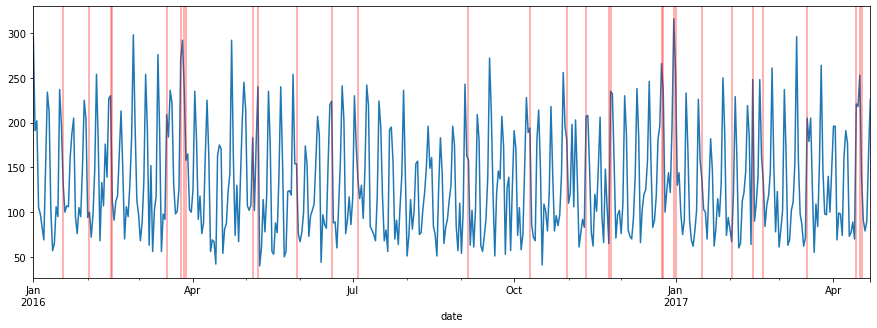

In [41]:
# Graph to portray that holidays fall on the day of high population

#ax = rv['holiday'].plot(figsize=(15,5))

ax = rv['total'].plot(figsize=(15,5))
for day in index_pos:
    ax.axvline(x = day, color='r', alpha=.4)

In [ ]:
# Smpling the Data into Train and Test

In [111]:
rv.weekday = rv.weekday.replace({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7})

In [61]:
train1 = rv2.iloc[0:477]
test1 = rv2.iloc[478:517] 

In [112]:
train = rv.iloc[0:450]
test = rv.iloc[450:479] 

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

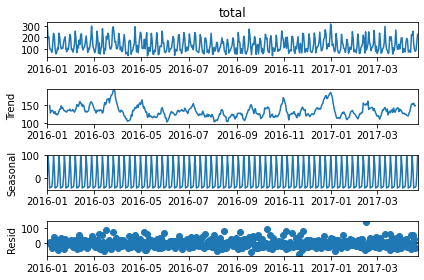

In [53]:
result =  seasonal_decompose(rv.total)
result.plot(); 

In [ ]:
# here we  will firdst build a model with SARIMA no X and then create it with SARIMA'X'

In [64]:
auto_arima (rv.total, seasonal=True, m=7)# maxiter to given iteration count

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [65]:
model_arima = SARIMAX(train.total, order=(1, 0, 0), seasonal_order=(1, 0, 1, 7))

C:\Users\PRIME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PRIME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [66]:
results_arima = model_arima.fit()

In [68]:
pred_rv_arima = results_arima.predict(start =450, end=477)
pred_rv_arima.round() # this prediction is withour X

2017-03-26    181.0
2017-03-27     92.0
2017-03-28     96.0
2017-03-29     95.0
2017-03-30     97.0
2017-03-31    145.0
2017-04-01    232.0
2017-04-02    175.0
2017-04-03     91.0
2017-04-04     96.0
2017-04-05     95.0
2017-04-06     97.0
2017-04-07    145.0
2017-04-08    232.0
2017-04-09    175.0
2017-04-10     91.0
2017-04-11     96.0
2017-04-12     95.0
2017-04-13     97.0
2017-04-14    145.0
2017-04-15    232.0
2017-04-16    175.0
2017-04-17     91.0
2017-04-18     96.0
2017-04-19     95.0
2017-04-20     97.0
2017-04-21    145.0
2017-04-22    232.0
Freq: D, Name: predicted_mean, dtype: float64

In [69]:
error_sarima = test['total'] - pred_rv_arima

In [80]:
mse_sarima = np.mean(np.square(error_sarima))
mse_sarima

884.2058432740263

In [79]:
mape_sarima = np.round(np.mean(np.abs(error_sarima*100/test['total'])))
mape_sarima

16.0

In [81]:
# How has our model done for Holidays

In [83]:
test[test['holiday']==1]

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-14,Friday,1,Good Friday,41.0,74.0,57.0,49.0,221.0
2017-04-16,Sunday,1,Easter,58.0,35.0,60.0,100.0,253.0
2017-04-17,Monday,1,Easter Monday,63.0,21.0,24.0,32.0,140.0


In [84]:
pred_rv_arima

2017-03-26    180.795817
2017-03-27     91.785128
2017-03-28     95.813346
2017-03-29     95.445185
2017-03-30     96.925812
2017-03-31    145.254155
2017-04-01    232.331304
2017-04-02    174.636170
2017-04-03     90.584548
2017-04-04     95.573998
2017-04-05     95.392577
2017-04-06     96.909341
2017-04-07    145.240868
2017-04-08    232.312435
2017-04-09    174.622171
2017-04-10     90.577307
2017-04-11     95.566369
2017-04-12     95.384965
2017-04-13     96.901608
2017-04-14    145.229278
2017-04-15    232.293897
2017-04-16    174.608236
2017-04-17     90.570079
2017-04-18     95.558743
2017-04-19     95.377353
2017-04-20     96.893875
2017-04-21    145.217689
2017-04-22    232.275361
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
# Ananlyse for the predictions done on the Holidays in the original data and predicted

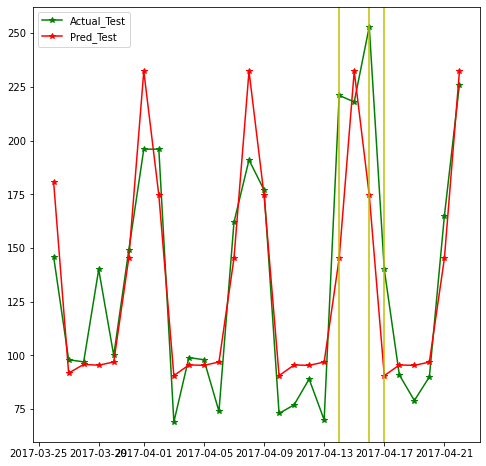

In [85]:
plt.figure(figsize= (8 , 8))
plt.plot(test.total , marker ="*" , color ="g" , label ="Actual_Test")
plt.plot(pred_rv_arima , color ="r" , marker ="*" ,label ="Pred_Test")
plt.legend()
plt.axvline(x = '2017-04-14' ,  color  = 'y')
plt.axvline(x = '2017-04-16' ,  color  = 'y')
plt.axvline(x = '2017-04-17' ,  color  = 'y')


In [ ]:
# in above code 'X'<- exogenous factor was not used

In [86]:
# Now built the model using X

In [87]:
# Difference bwteen Series and DataFrame 
rv['holiday']

date
2016-01-01    1
2016-01-02    0
2016-01-03    0
2016-01-04    0
2016-01-05    0
             ..
2017-04-18    0
2017-04-19    0
2017-04-20    0
2017-04-21    0
2017-04-22    0
Name: holiday, Length: 478, dtype: int64

In [89]:
rv[['holiday']]

,holiday
date,
2016-01-01,1
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
...,...
2017-04-18,0
2017-04-19,0
2017-04-20,0


In [ ]:
# Pass Exogenous in DataFrame becuase there can be multiple exogenous factor, 
# eg: holiday, weekend, etc

In [90]:
model_sarimax = SARIMAX(train['total'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 7), exog = train[['holiday']])

C:\Users\PRIME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PRIME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [91]:
result_sarima =  model_sarimax.fit()

C:\Users\PRIME\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [94]:
pred_rv_sarima = result_sarima.predict(start =450, end=477, exog = test[['holiday']])

In [96]:
error = pred_rv_sarima - test['total']

In [98]:
mse_sarima = np.mean(np.square(error))
mse_sarima

359.2228268412278

In [100]:
mape_sarima = np.round(np.mean(np.abs(error *100/test['total']))) 
mape_sarima                                     

12.0

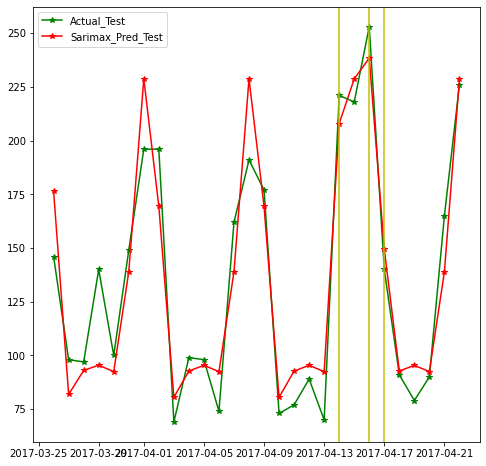

In [104]:
plt.figure(figsize= (8 , 8))
plt.plot(test.total , marker ="*" , color ="g" , label ="Actual_Test")
plt.plot(pred_rv_sarima , color ="r" , marker ="*" ,label ="Sarimax_Pred_Test")
plt.legend()
plt.axvline(x = '2017-04-14' ,  color  = 'y')
plt.axvline(x = '2017-04-16' ,  color  = 'y')
plt.axvline(x = '2017-04-17' ,  color  = 'y')

In [106]:
test_rv1  = test
test_rv1[' pred_rv_arima']  = pred_rv_arima
test_rv1['pred_rv_sarima']  = pred_rv_sarima
test_rv1[test_rv1['holiday'] == 1 ]

C:\Users\PRIME\AppData\Local\Temp/ipykernel_4268/3084774162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rv1[' pred_rv_arima']  = pred_rv_arima
C:\Users\PRIME\AppData\Local\Temp/ipykernel_4268/3084774162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rv1['pred_rv_sarima']  = pred_rv_sarima


,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,pred_rv_arima,pred_rv_sarima,pred_rv_sarima
date,,,,,,,,,,,
2017-04-14,Friday,1,Good Friday,41.0,74.0,57.0,49.0,221.0,145.229278,207.897394,207.897394
2017-04-16,Sunday,1,Easter,58.0,35.0,60.0,100.0,253.0,174.608236,238.342614,238.342614
2017-04-17,Monday,1,Easter Monday,63.0,21.0,24.0,32.0,140.0,90.570079,149.437545,149.437545


In [ ]:
# Taking Weekend as a X factor

In [114]:
model_sarimax = SARIMAX(train['total'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 7), exog = train[['holiday','weekday']])

C:\Users\PRIME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PRIME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [1]:
pred_rv_sarima = result_sarima.predict(start =450, end=477, exog = test[['holiday', 'weekday']])